##MILK QUALITY PREDICTION USING MACHINE LEARNING(Classification)

dataset source: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

#Objectives
- to predict the quality of milk based on seven readily observable milk characteristics.

- categorize milk into three distinct groups: low quality, moderate quality, and high quality.

- Use classification model to produce accurate results


#Dataset FEATURES
This dataset was collected through manual observations, and it serves as the foundation for constructing machine learning models aimed at predicting milk quality. The dataset comprises seven distinct factors:

1. **pH:** This factor represents the pH level of the milk, which falls within a range of 3 to 9.5.

2. **Temperature:** This factor denotes the temperature of the milk, with values ranging from 34°C to 90°C.

3. **Taste:** The "taste" factor characterizes the flavor of the milk and is categorized as either 1 (indicating good taste) or 0 (indicating bad taste).

4. **Odor:** The "odor" factor describes the aroma of the milk and can be classified as either 1 (indicating a pleasant odor) or 0 (indicating an unpleasant odor).

5. **Fat:** The "fat" factor signifies the fat content of the milk and can be classified as either 1 (indicating an adequate fat level) or 0 (indicating an inadequate fat level).

6. **Turbidity:** The "turbidity" factor quantifies the cloudiness or clarity of the milk and can be categorized as either 1 (indicating good clarity) or 0 (indicating poor clarity).

7. **Color:** This factor characterizes the color of the milk, which ranges from 240 to 255.

The ultimate target of interest is the "grade" of the milk, which can take on one of three values: "low_quality," "medium_quality," or "high_quality."


Importing Necessary libraries

In [2]:
# For Data processing
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from matplotlib import style

# importing packages
import warnings
warnings.filterwarnings("ignore")

# For data modelling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support


Reading The DATA

In [3]:
#Reading the dataset from github
db=pd.read_csv('https://raw.githubusercontent.com/kamal7k/milk_quality/main/milknew.csv') #Load data into a dataframe

In [4]:
#Displaying top 5 rows
db.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
#Displaying the last 5 rows
db.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


Data Cleaning

In [6]:
#Creating copy of original dataset
df=db.copy()

In [7]:
# Rename columns
df = df.rename(columns={'Temprature':'Temperature'})

# Remove any empty spaces in header col
df.columns = df.columns.str.replace(' ', '')

In [8]:
#summary statistics for all columns,includes(mean,std and IQR values)
df.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [9]:
#Displaying number of rows and column of dataset
df.shape

(1059, 8)

In [10]:
#displaying columns
df.columns

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [11]:
df.duplicated().sum() #The dataset has no key, this maybe the reason why we are picking up so many duplicate records.

976

In [12]:
# Shows number of unique values for each variable.
df.nunique(axis=0)

pH             16
Temperature    17
Taste           2
Odor            2
Fat             2
Turbidity       2
Colour          9
Grade           3
dtype: int64

In [13]:
#Inspecting and summarizing the unique values in each column of the DataFrame
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('\n')

pH
[6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4]


Temperature
[35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65]


Taste
[1 0]


Odor
[0 1]


Fat
[1 0]


Turbidity
[0 1]


Colour
[254 253 246 255 250 247 245 240 248]


Grade
['high' 'low' 'medium']




In [14]:
df['Grade']

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

Checking for NaN value

In [15]:
#Checking null values from the dataFrame
pd.DataFrame(df.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
pH,0
Temperature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


<Axes: >

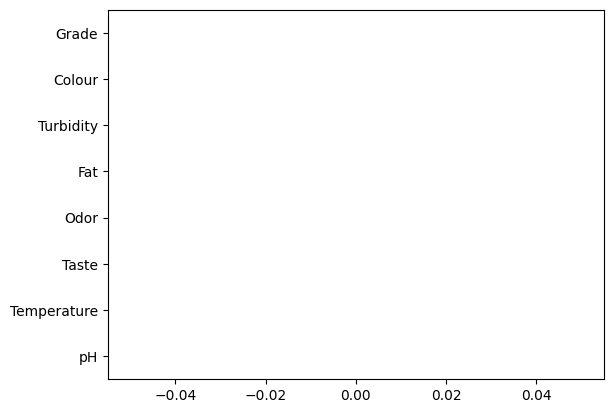

In [16]:
#Plotting the null value
df.isna().sum().plot.barh()

In [17]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('\n')

pH
6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64


Temperature
45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temperature, dtype: int64


Taste
1    579
0    480
Name: Taste, dtype: int64


Odor
0    601
1    458
Name: Odor, dtype: int64


Fat
1    711
0    348
Name: Fat, dtype: int64


Turbidity
0    539
1    520
Name: Turbidity, dtype: int64


Colour
255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: Colour, dtype: int64


Grade
low       429
medium    374
high      256
Name: Grade, dtype: int64




In [18]:
 #summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [19]:
#Checking propotion between positive and negative results
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

SKEW

In [20]:
#Skew measure of how misleading a data sample is from the normal distribution.

In [21]:
df.skew()

pH            -0.683904
Temperature    2.216739
Taste         -0.188058
Odor           0.272949
Fat           -0.730799
Turbidity      0.035940
Colour        -1.024902
dtype: float64

In [22]:
from scipy import stats
Temperature_boxcox=stats.boxcox(df['Temperature'])[0]
pd.Series(Temperature_boxcox).skew()

0.0

#Data Analysis/Visualization

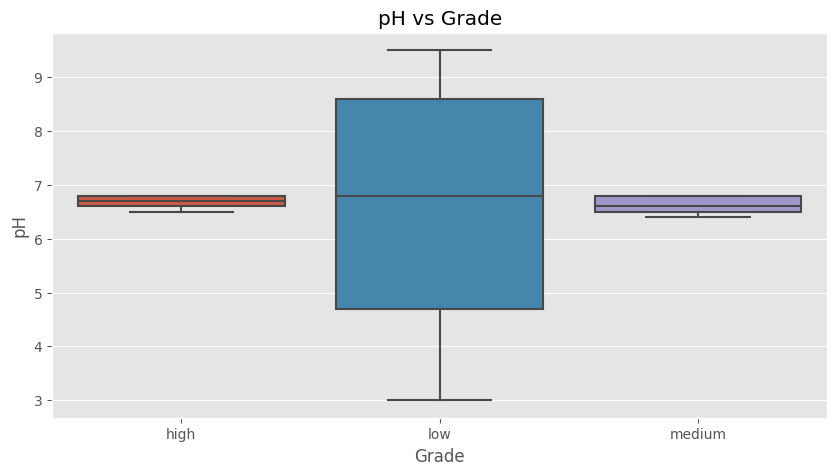

In [23]:
#PH vs Grade
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Grade", y="pH")
plt.title('pH vs Grade')
plt.xlabel('Grade')
plt.ylabel('pH')
plt.show()


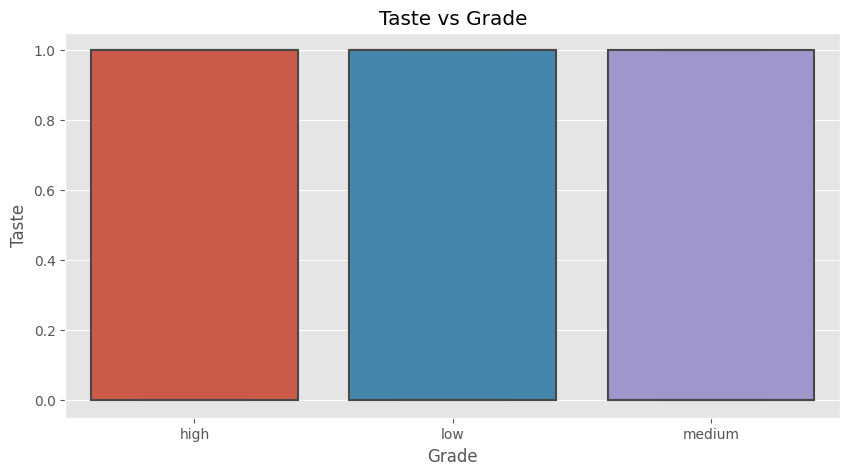

In [24]:
#Taste vs Grade plot
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Grade", y="Taste")
plt.title('Taste vs Grade')
plt.xlabel('Grade')
plt.ylabel('Taste')
plt.show()

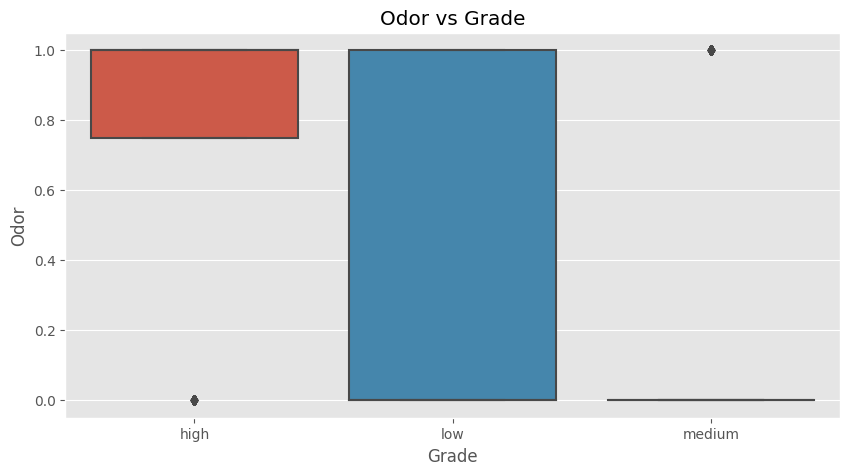

In [25]:
#Odor vs Grade plot
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Grade", y="Odor")
plt.title('Odor vs Grade')
plt.xlabel('Grade')
plt.ylabel('Odor')
plt.show()

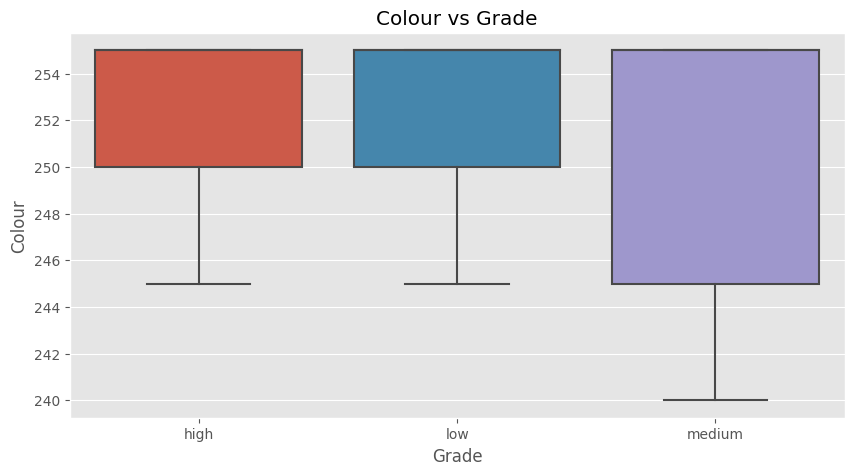

In [26]:
#Colour vs Grade plot
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Grade", y="Colour")
plt.title('Colour vs Grade')
plt.xlabel('Grade')
plt.ylabel('Colour')
plt.show()

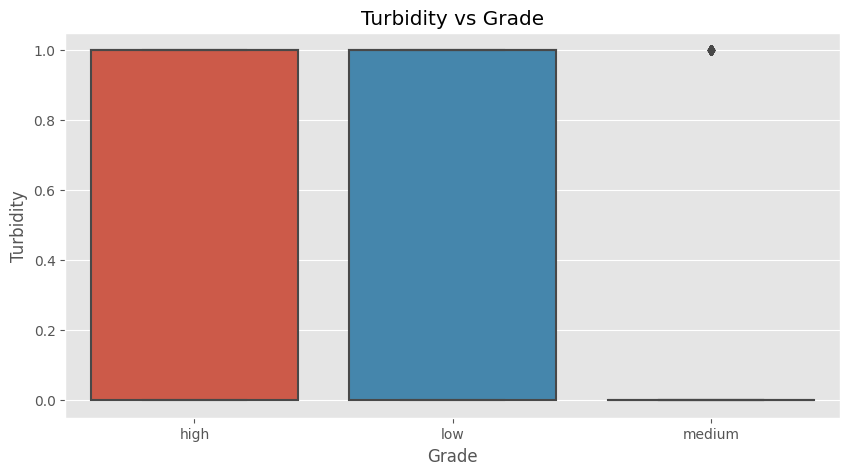

In [27]:
#Turbidity vs Grade plot
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Grade", y="Turbidity")
plt.title('Turbidity vs Grade')
plt.xlabel('Grade')
plt.ylabel('Turbidity')
plt.show()

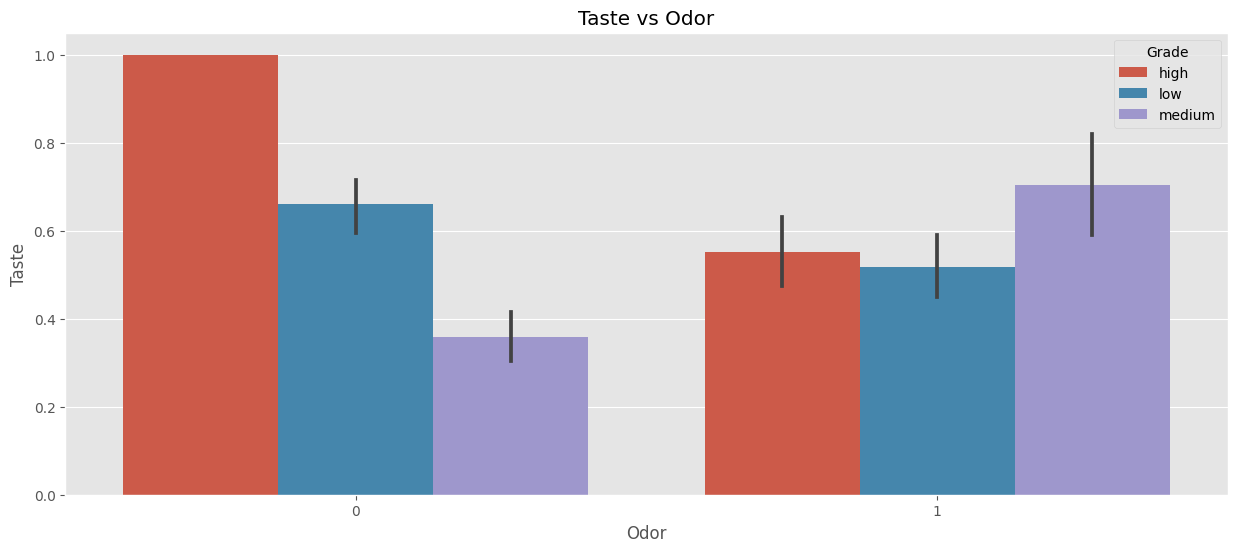

In [28]:
#visualizing the relation between features
plt.figure(figsize=(15,6))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=df)
plt.title('Taste vs Odor')
plt.show()

<Axes: >

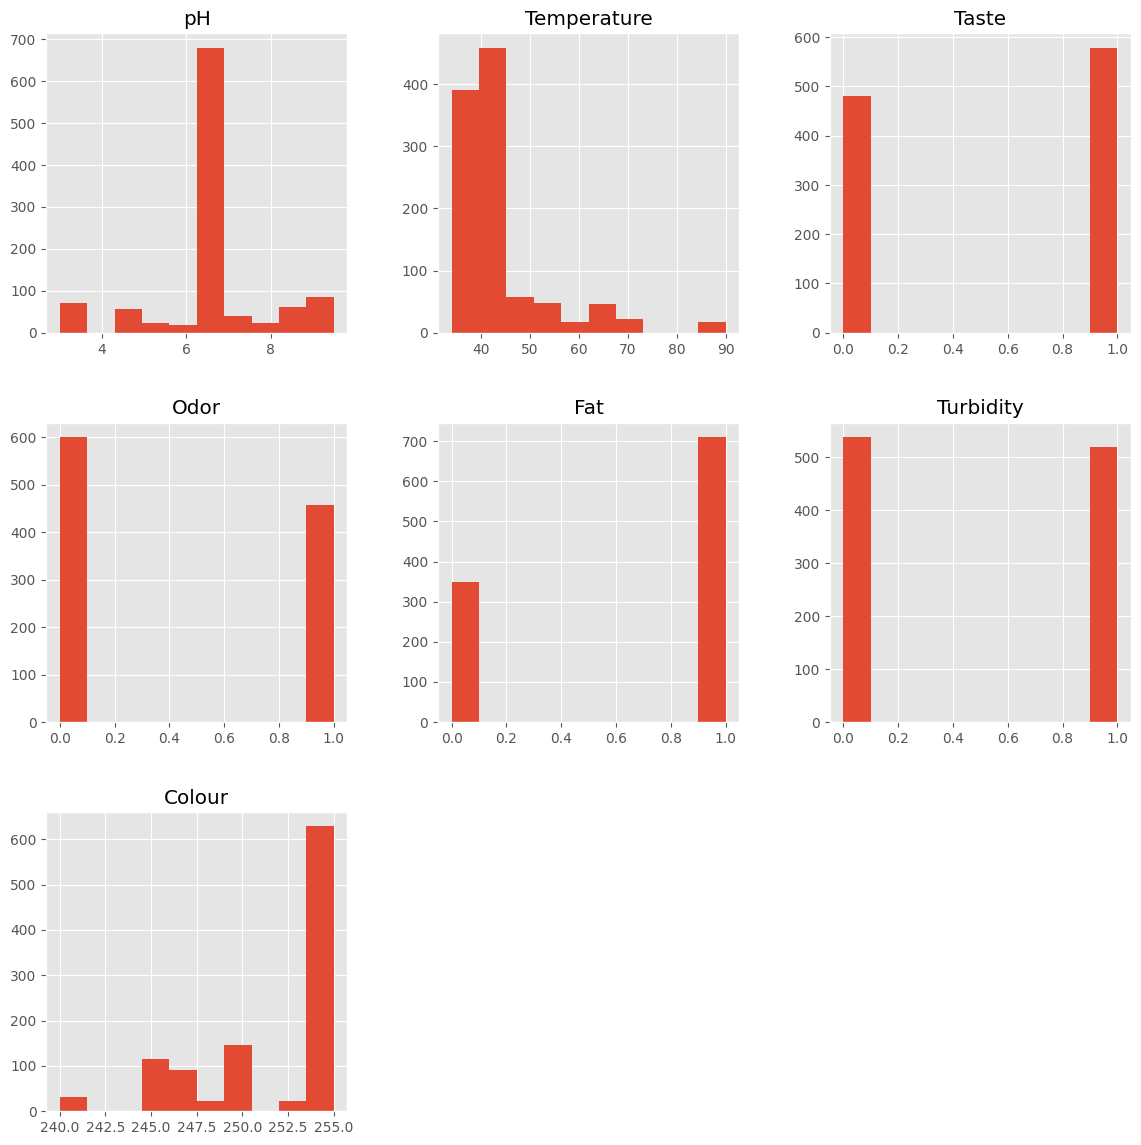

In [29]:
#Using seaborn to visualize correlations using histograms.
df.hist(figsize=(14,14))
sns.lineplot()

In [30]:
#Pie chart
low = df[df.Grade == 'low']
medium = df[df.Grade == 'medium']
high = df[df.Grade == 'high']
grade_percentage = []
grade_percentage.append((len(low)/len(df))*100)
grade_percentage.append((len(medium)/len(df))*100)
grade_percentage.append((len(high)/len(df))*100)
grade_label = ['low','medium','high']

([<matplotlib.patches.Wedge at 0x7f4c68599f60>,
 [Text(0.32311683962794846, 1.0514730181744307, 'low'),
  Text(-0.9582871193329785, -0.5400794357504293, 'medium'),
  Text(0.7977433271068087, -0.7573675356500036, 'high')],
 [Text(0.17624554888797186, 0.5735307371860531, '40.5%'),
  Text(-0.5227020650907155, -0.29458878313659775, '35.3%'),
  Text(0.4351327238764411, -0.4131095649000019, '24.2%')])

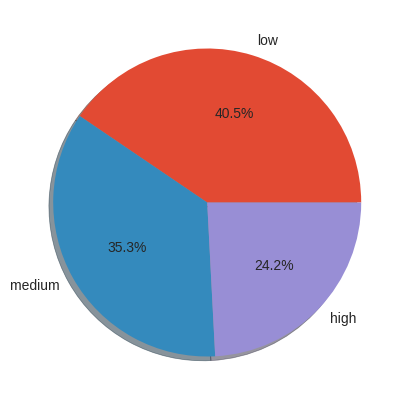

In [31]:
style.use('seaborn-dark')
plt.figure(figsize=(5,5))
plt.pie(grade_percentage, labels=grade_label, autopct='%1.1f%%',shadow=True)

Violin Plots

<Axes: xlabel='pH', ylabel='Temperature'>

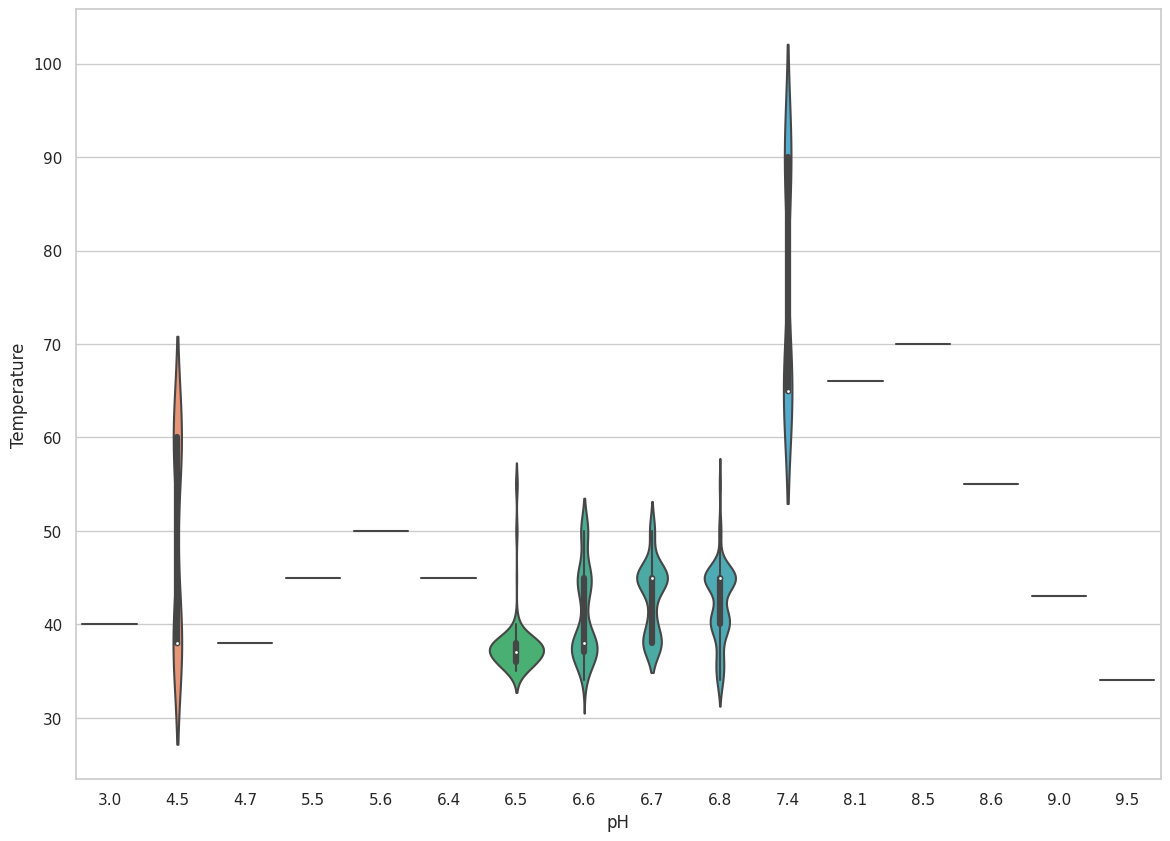

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,10))
#plt.subplot(2,3,1)
sns.violinplot(x='pH',y='Temperature',data=df)

The line plots and histograms reveal that as the temperature increases from 30°C to 100°C, the pH values also increase.
This indicates a positive correlation between temperature and pH values.

Text(0.5, 1.0, 'Grade Interval and Counts')

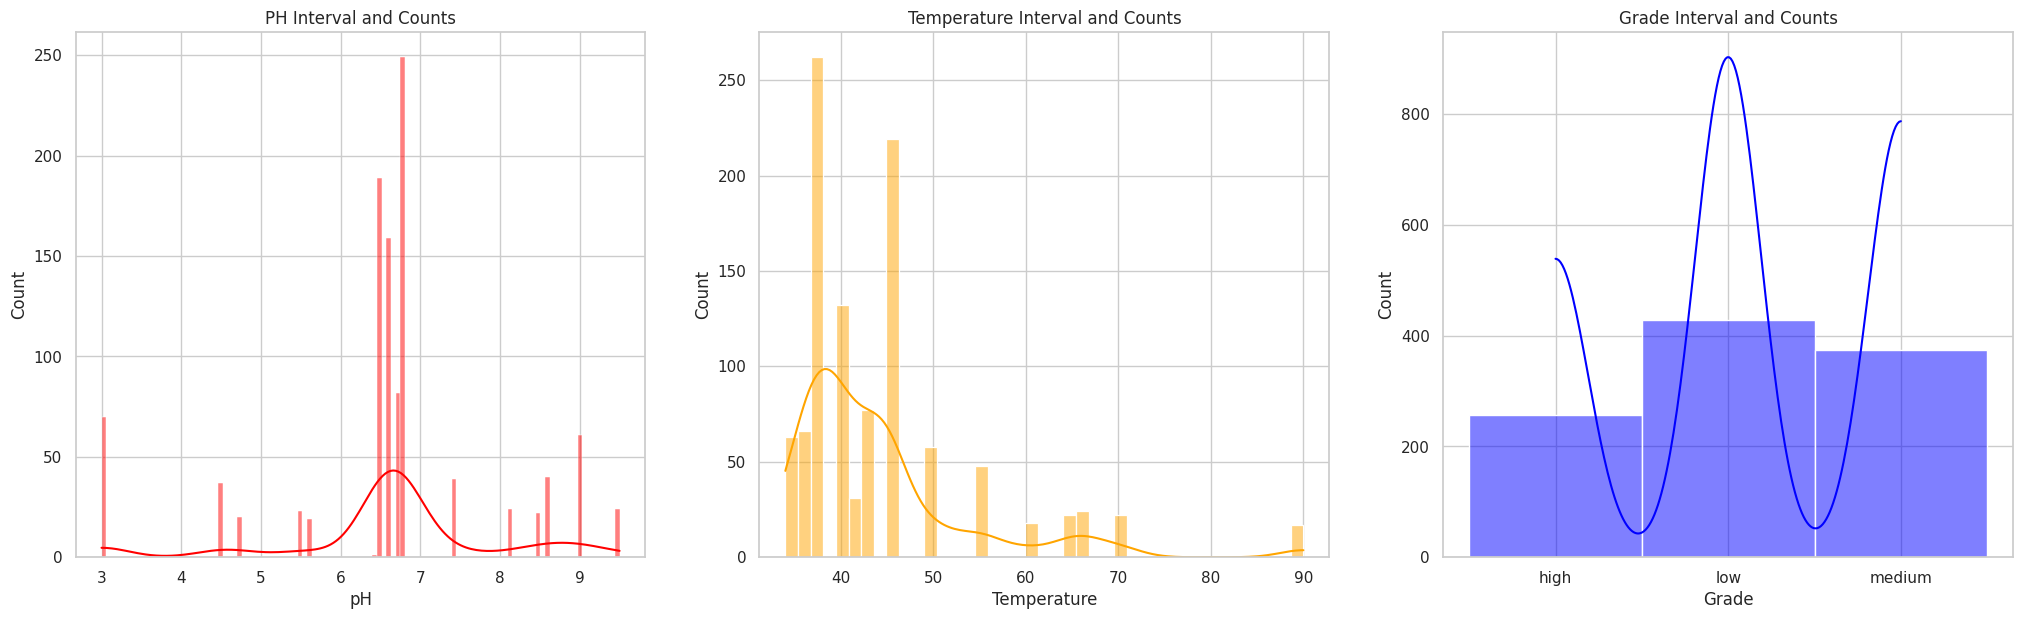

In [33]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(df['pH'], color = 'red', kde = True).set_title('PH Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(df['Temperature'], color = 'Orange', kde = True).set_title('Temperature Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(df['Grade'], kde = True, color = 'blue').set_title('Grade Interval and Counts')


- Majority of the milk have pH less than 7 indicating that milk is slightly acidic in nature.
- The milk is mostly produced well under 50 degrees!
- low grade milk count is very high

#Correlation

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect

In [34]:
#Correlation matrix (Heat Mapp)

<Axes: >

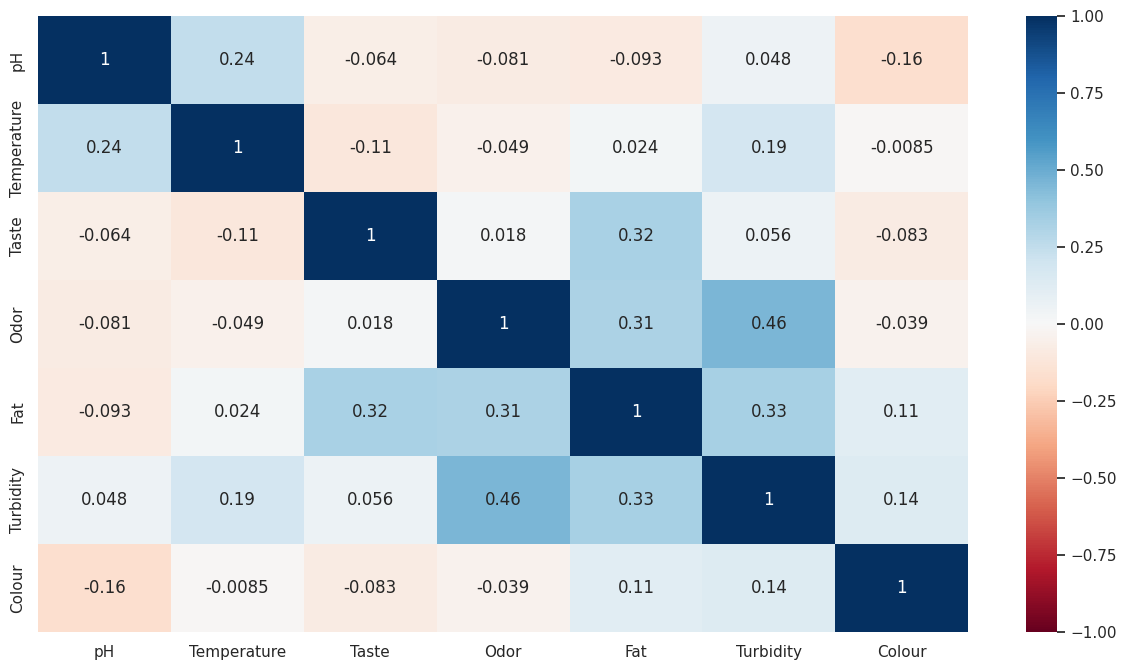

In [35]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax= 1 , annot=True)

* pH correlates positively with temperature, turbidity
* Relation between pH and temeprature is stronger than relation between pH and turbidity
* Temperature correlates  positively with fat and turbidity
* Taste correlates positively with fat, odor and turbidity
* Relation between odor and turbidity is stronger than relation between odor and fat


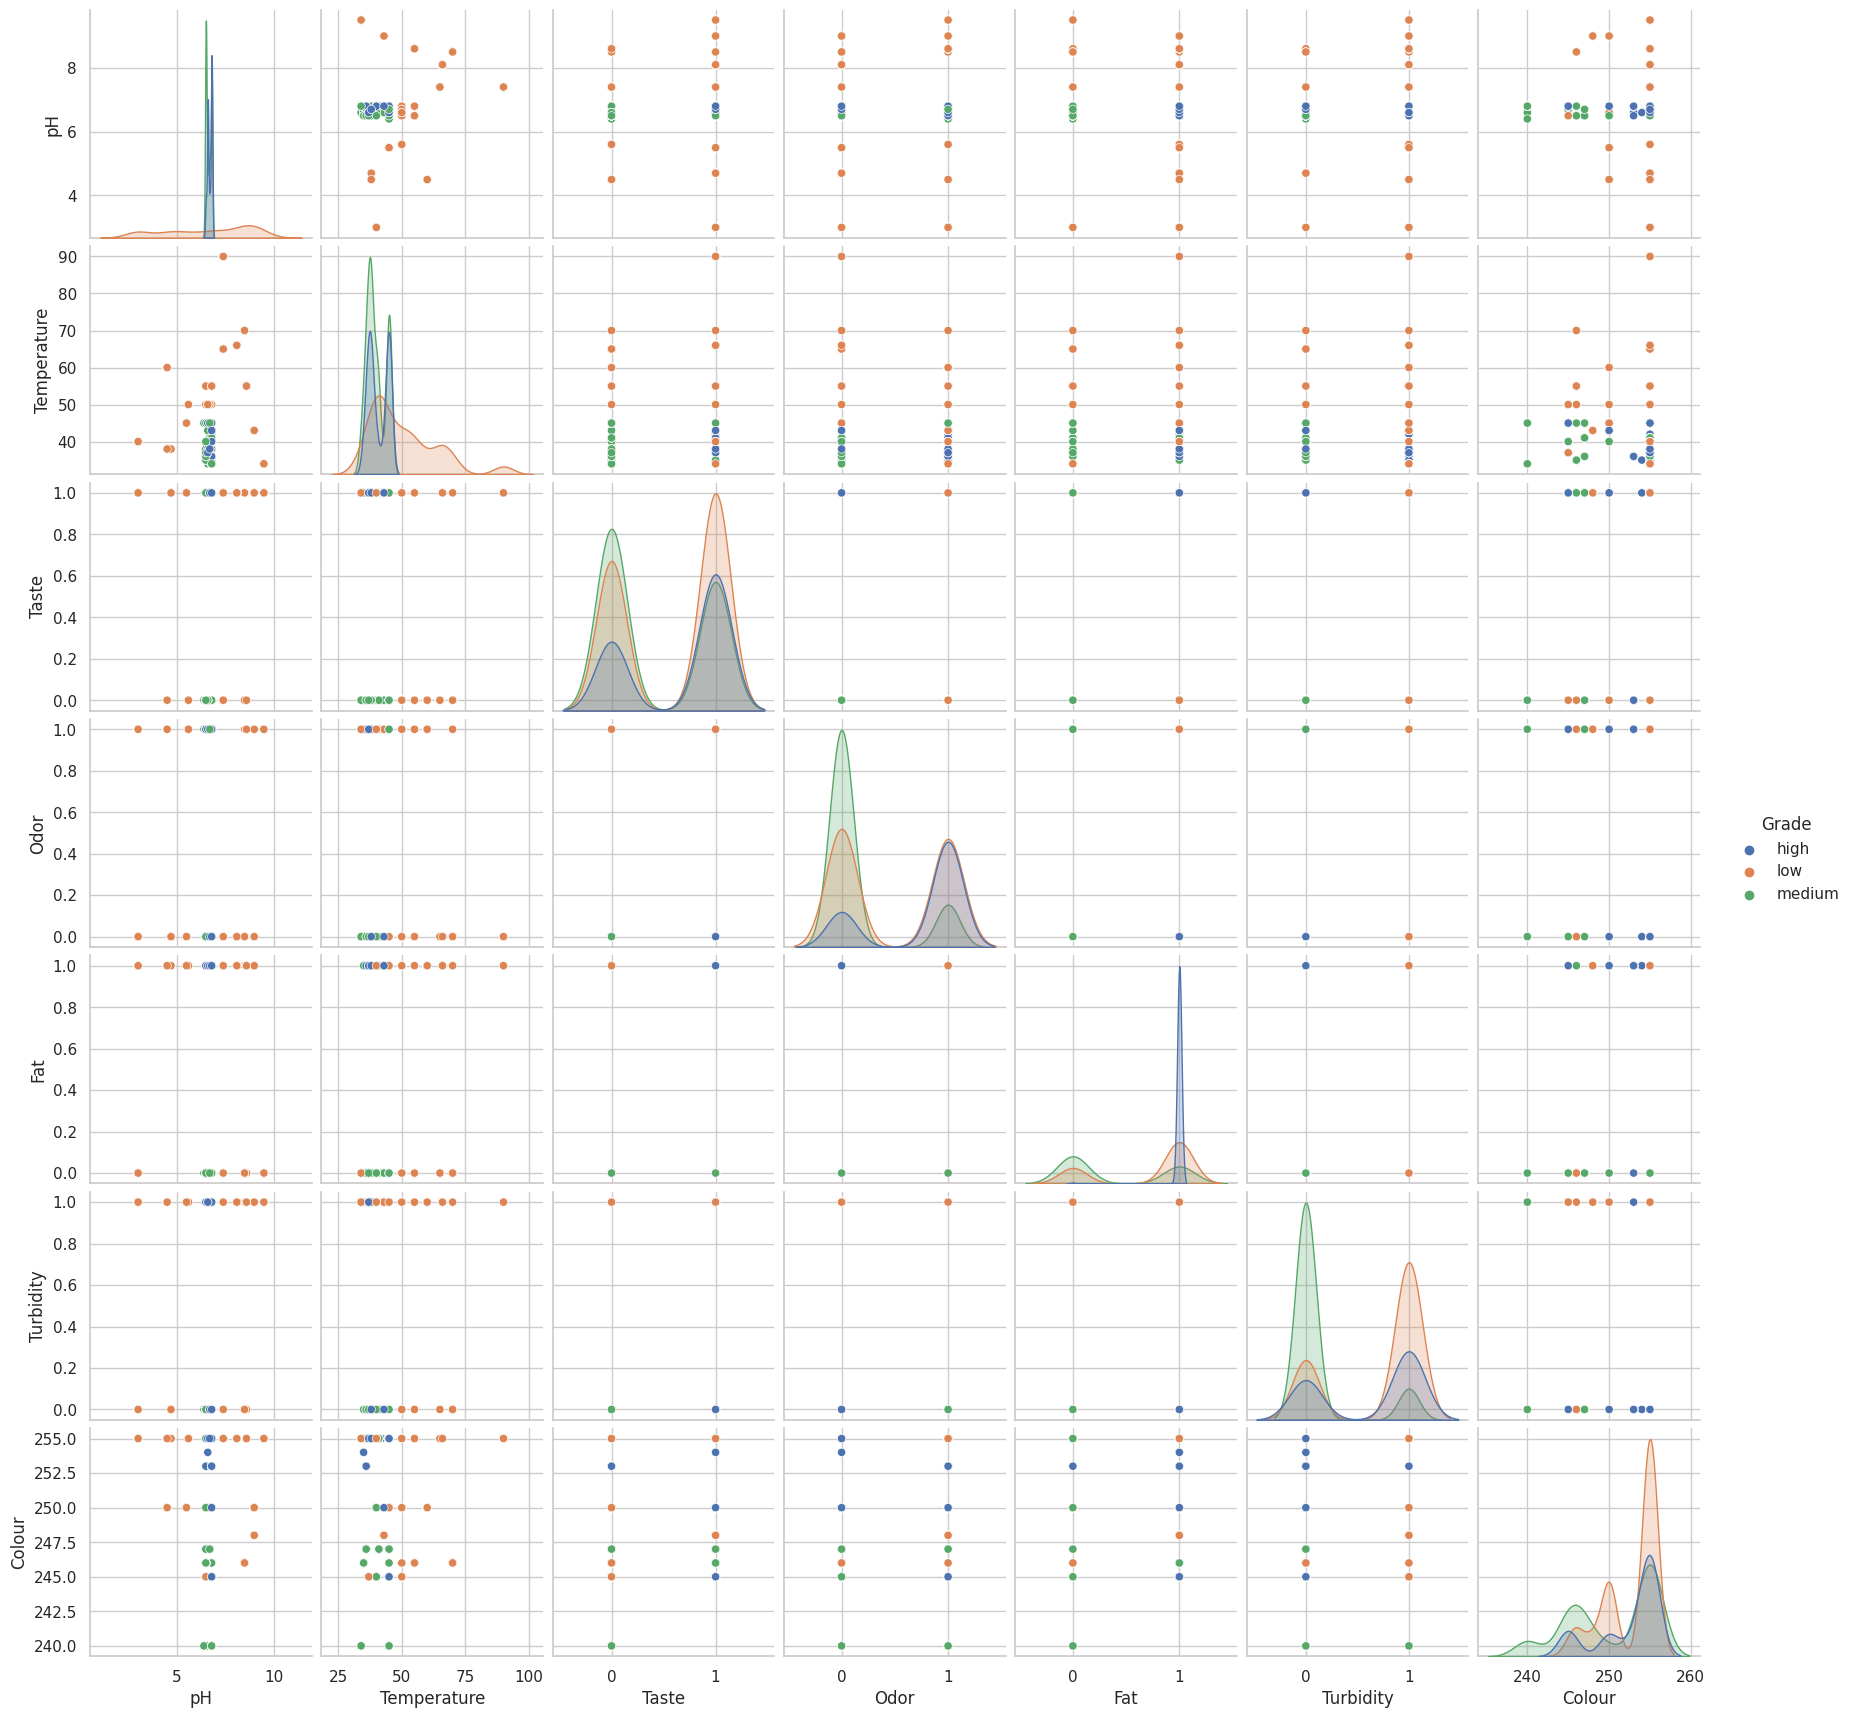

In [36]:
sns.pairplot(df, hue = 'Grade')

#Training Data
Out-of-sample accuracy is how well a model predicts new data it hasn't seen before. Testing a model on the same data it was trained on can lead to low accuracy due to overfitting. To get a better measure of accuracy, we split the data into two parts: one for training and one for testing. This helps evaluate how well the model does on unseen data in real-world situations.

In [37]:
df['Grade'].replace({'high':2,'medium':1,'low':0},inplace=True)
df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [38]:
X = df[['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']]
y = df[['Grade']]

In [39]:
### Standardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 7)
(741, 1)
(318, 7)
(318, 1)


Model Building

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

svm=SVC()
svm.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:

y_pred1=knn.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=dt.predict(X_test)
y_pred4=rf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print("Accuracy Result:")
print("KNN",accuracy_score(y_test,y_pred1))
print("SVM",accuracy_score(y_test,y_pred2))
print("Decision tree",accuracy_score(y_test,y_pred3))
print("Random Forest",accuracy_score(y_test,y_pred4))

Accuracy Result:
KNN 0.9842767295597484
SVM 0.940251572327044
Decision tree 0.9937106918238994
Random Forest 0.9968553459119497


The Decision Tree and Random Forest algorithms produced the greatest accuracy scores among the studied models, with 99.37% and 99.69%, respectively. These models outperformed the K-Nearest Neighbours (KNN) and Support Vector Machine (SVM) models, which obtained 98.43% and 94.03% accuracy, respectively.

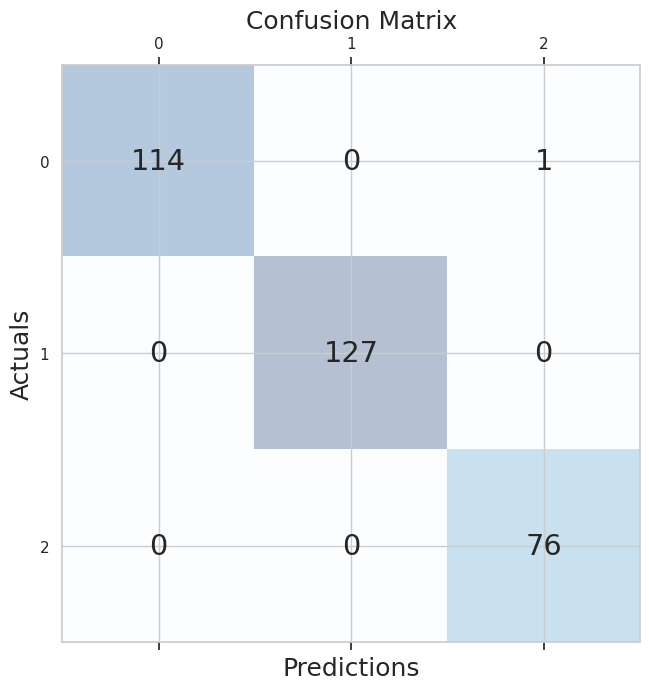

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred3)
cm = confusion_matrix(y_test, y_pred4)


fig, df = plt.subplots(figsize=(7.5, 7.5))
df.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        df.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

A confusion matrix is a table that is frequently used to evaluate the effectiveness of a classification model. It provides an in-depth examination of how the model's predictions measure out against the actual accurate values.
In this figure there is only one faulty value

#References:
GeeksforGeeks. (2020). Pandas Profiling in Python. [online] Available at: https://www.geeksforgeeks.org/pandas-profiling-in-python/ [Accessed 5 Oct. 2023].

‌